# Importing libraries

In [1]:
import keras
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

2.6.0
2.6.2


In [2]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

# Importing dataset

In [4]:
train_dir = "../input/plant-images/images/Train"
test_dir = "../input/plant-images/images/Test"

In [5]:
# Returns count of images/classes in dataset

def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [6]:
# Getting no. of samples and classes

train_samples = get_files(train_dir)

num_classes = len(glob.glob(train_dir+"/*"))

test_samples=get_files(test_dir)
num_classes_test = len(glob.glob(test_dir+"/*"))

print(num_classes,"Classes")
print(train_samples,"Train images")

print(num_classes_test, "Classes")
print(test_samples,"Test images")

38 Classes
5174 Train images
38 Classes
205 Test images


In [7]:
# Increasing samples by modifying i.e. zooiming, flipping, etc.

from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      validation_split=0.2, # 20% data reserved for validation
      fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
# This function identifies images related to classes

img_width,img_height =256,256

input_shape=(img_width,img_height,3)

batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir, target_size=(img_width,img_height), batch_size=batch_size)

test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(img_width,img_height), batch_size=batch_size)

Found 5174 images belonging to 38 classes.
Found 205 images belonging to 38 classes.


In [9]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper__bell___Bacterial_spot': 18,
 'Pepper__bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Tomat

In [10]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper__bell___Bacterial_spot': 18,
 'Pepper__bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Tomat

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization

# Building CNN Model

In [12]:
# Building the model
# 3 convolution layers, 3 maxpooling layers, 1 dropout layer, 3 hidden layers

model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(128,activation='relu'))  

model.add(Dense(num_classes,activation='softmax'))

2021-12-30 10:52:10.512929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 10:52:10.604490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 10:52:10.605176: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 10:52:10.606239: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
# categorical_crossentropy creates one-hot encoding

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

In [15]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


In [16]:
# validation images (20 %)

validation_generator = train_datagen.flow_from_directory(
                       train_dir, 
                       target_size=(img_height, img_width),
                       batch_size=batch_size)

Found 5174 images belonging to 38 classes.


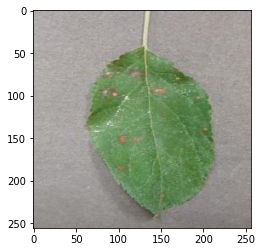

In [17]:
from keras.preprocessing import image
import numpy as np

img_path = "../input/plant-images/images/Train/Apple___Cedar_apple_rust/0a41c25a-f9a6-4c34-8e5c-7f89a6ac4c40___FREC_C.Rust 9807_180deg.JPG"

img1 = image.load_img(img_path)
plt.imshow(img1);
#preprocess image
img1 = image.load_img(img_path, target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [18]:
from keras.models import Model

conv2d_0_output=Model(inputs=model.input,outputs=model.get_layer('conv2d').output)

max_pooling2d_0_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)

conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_2').output)

max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)

conv2d_2_output=Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)

max_pooling2d_2_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)

flatten_1_output=Model(inputs=model.input,outputs=model.get_layer('flatten').output)

conv2d_0_features = conv2d_0_output.predict(img)

max_pooling2d_0_features = max_pooling2d_0_output.predict(img)

conv2d_1_features = conv2d_1_output.predict(img)

max_pooling2d_1_features = max_pooling2d_1_output.predict(img)

conv2d_2_features = conv2d_2_output.predict(img)

max_pooling2d_2_features = max_pooling2d_2_output.predict(img)

flatten_1_features = flatten_1_output.predict(img)

2021-12-30 10:52:13.536897: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-30 10:52:14.356221: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


# Plotting the images after every layer

In [19]:
import matplotlib.image as mpimg

# function to plot images after each layer

def plot_images(img_width, img_height, rows, columns, layer):
    fig=plt.figure(figsize=(img_width,img_height))
    columns = columns
    rows = rows
    for i in range(columns*rows):
        fig.add_subplot(rows, columns, i+1)
        plt.axis('off')
        plt.title('filter'+str(i))
        plt.imshow(layer[0, :, :, i], cmap='viridis') # Visualizing in color mode.
    plt.show()

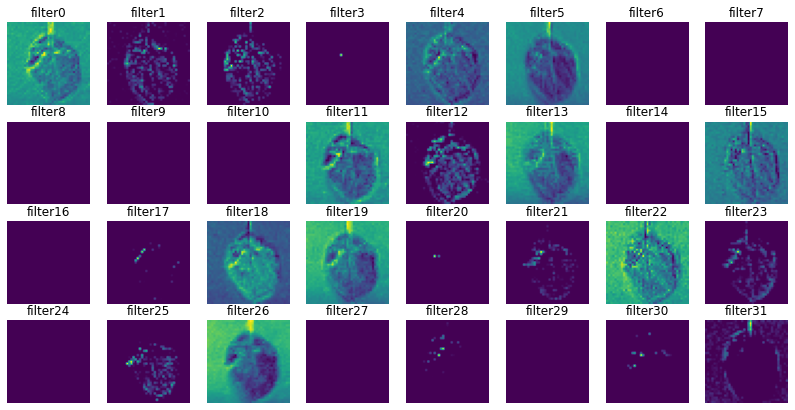

In [20]:
## conv2d_0_features

img_width = 14
img_height = 7

columns = 8
rows = 4

layer = conv2d_1_features

plot_images(img_width, img_height, rows, columns, layer)

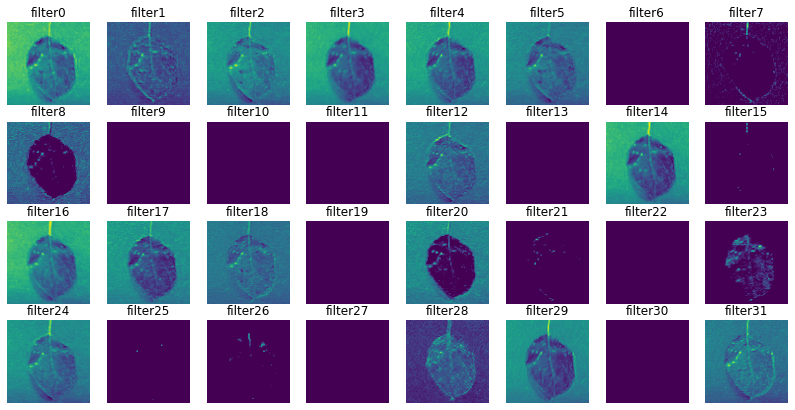

In [21]:
## max_pooling2d_0_features

img_width = 14
img_height = 7

columns = 8
rows = 4

layer = max_pooling2d_0_features

plot_images(img_width, img_height, rows, columns, layer)

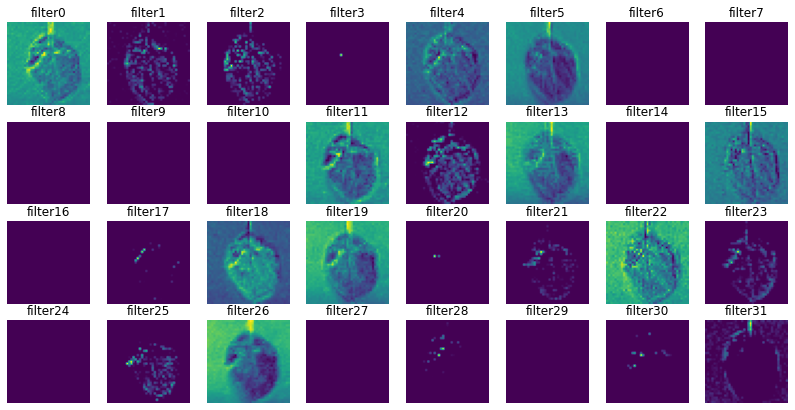

In [22]:
## conv2d_1_features

img_width = 14
img_height = 7

columns = 8
rows = 4

layer = conv2d_1_features

plot_images(img_width, img_height, rows, columns, layer)

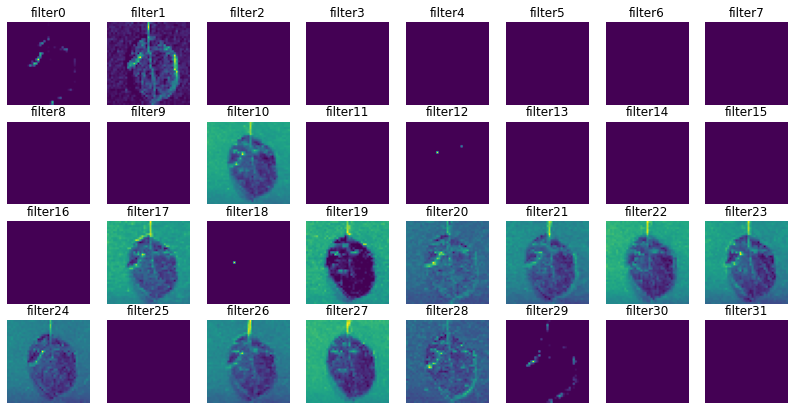

In [23]:
## max_pooling2d_1_features

img_width = 14
img_height = 7

columns = 8
rows = 4

layer = max_pooling2d_1_features

plot_images(img_width, img_height, rows, columns, layer)

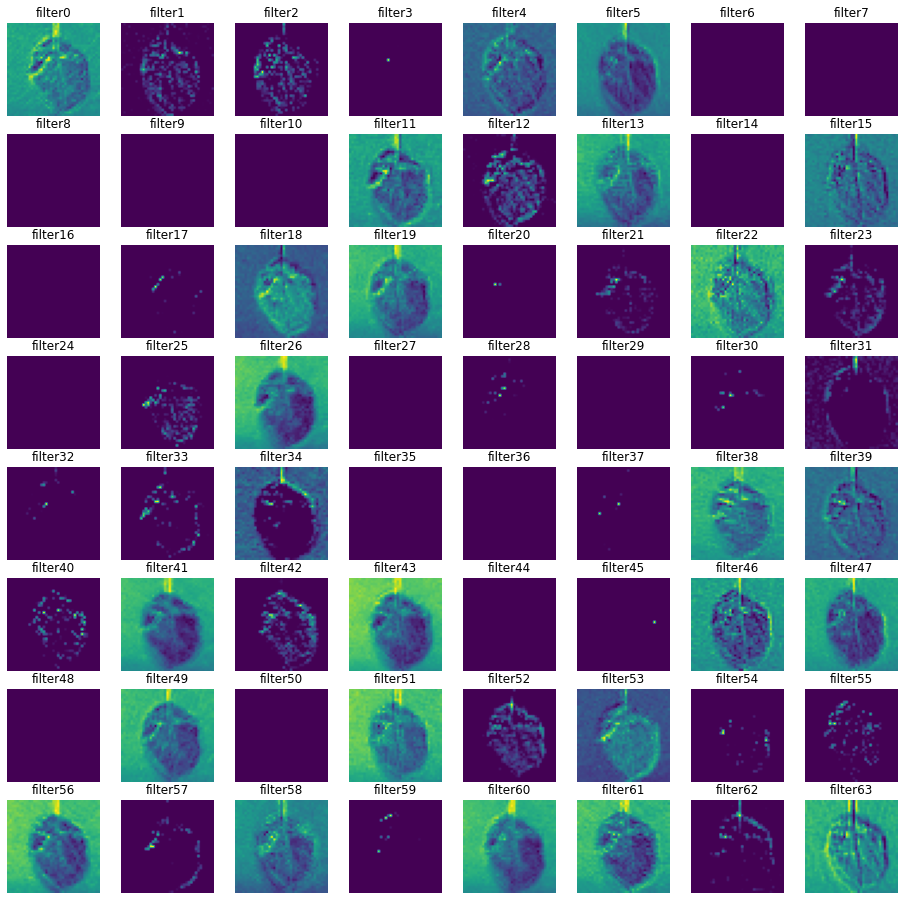

In [24]:
## conv2d_2_features

img_width = 16
img_height = 16

columns = 8
rows = 8

layer = conv2d_2_features

plot_images(img_width, img_height, rows, columns, layer)

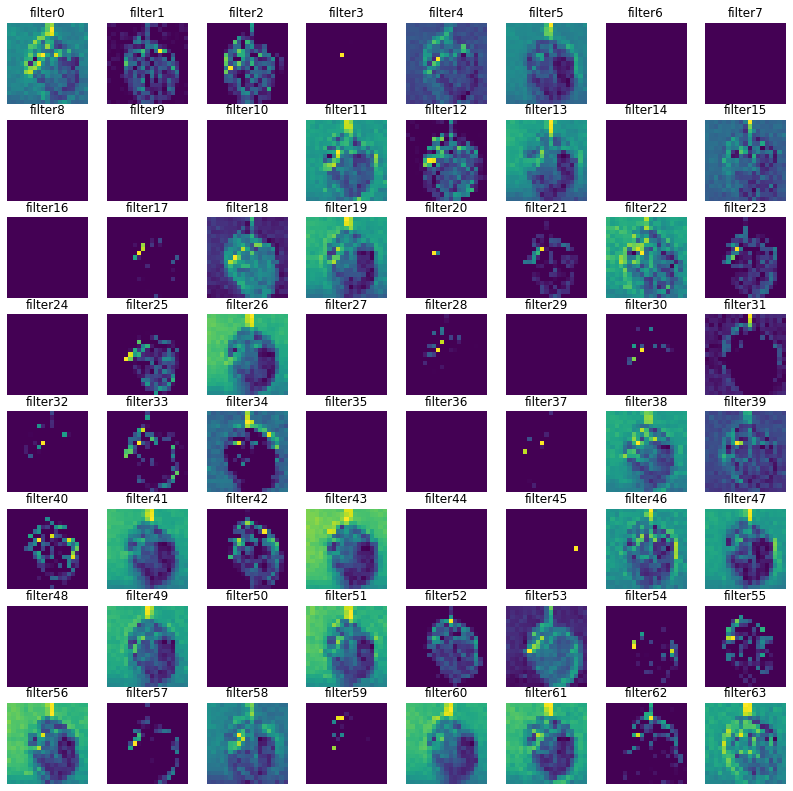

In [25]:
## max_pooling2d_2_features

img_width = 14
img_height = 14

columns = 8
rows = 8

layer = max_pooling2d_2_features

plot_images(img_width, img_height, rows, columns, layer)

# Training

In [26]:
# Plotting, accuracy and loss graphs for training and validation sets

def plot_results_graphs(train):
    acc = train.history['accuracy']
    val_acc = train.history['val_accuracy']
    
    loss = train.history['loss']
    val_loss = train.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    #Train and validation accuracy
    
    plt.plot(epochs, acc, 'b', label='Training accurarcy')
    plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
    plt.title('Training and Validation accurarcy')
    plt.legend()

    plt.figure()
    
    #Train and validation loss
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.show()
    

In [27]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4, restore_best_weights=True)

In [28]:
epochs = 20

train=model.fit(train_generator,epochs=epochs, steps_per_epoch=train_generator.samples//batch_size, 
                          validation_data=validation_generator,
                          validation_steps=validation_generator.samples // batch_size,verbose=1, callbacks=[callback])

Epoch 1/20
161/161 [==============================] - 164s 1s/step - loss: 3.3559 - accuracy: 0.0933 - val_loss: 2.8699 - val_accuracy: 0.1900
Epoch 2/20
161/161 [==============================] - 140s 873ms/step - loss: 2.6286 - accuracy: 0.2447 - val_loss: 2.0662 - val_accuracy: 0.3932
Epoch 3/20
161/161 [==============================] - 142s 883ms/step - loss: 1.9602 - accuracy: 0.4255 - val_loss: 1.6095 - val_accuracy: 0.5169
Epoch 4/20
161/161 [==============================] - 141s 878ms/step - loss: 1.4875 - accuracy: 0.5502 - val_loss: 1.0571 - val_accuracy: 0.6859
Epoch 5/20
161/161 [==============================] - 141s 876ms/step - loss: 1.1741 - accuracy: 0.6369 - val_loss: 1.0077 - val_accuracy: 0.6865
Epoch 6/20
161/161 [==============================] - 140s 870ms/step - loss: 0.9784 - accuracy: 0.6972 - val_loss: 0.6578 - val_accuracy: 0.7979
Epoch 7/20
161/161 [==============================] - 142s 885ms/step - loss: 0.7987 - accuracy: 0.7417 - val_loss: 0.5809 - va

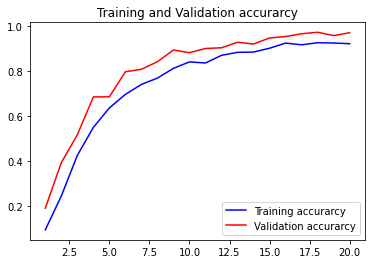

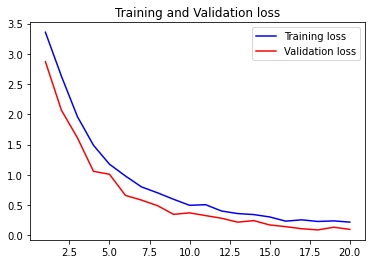

In [29]:
plot_results_graphs(train)

# Testing

In [39]:
# Pre-Processing test data same as train data.

img_width = 256
img_height = 256

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255.0
    return np.expand_dims(x, axis=0)

In [40]:
Classes = ["Apple___Apple_scab", 
           "Apple___Black_rot", 
           "Apple___Cedar_apple_rust", 
           "Apple___healthy", 
           "Blueberry___healthy", 
           "Cherry_(including_sour)___Powdery_mildew", 
           "Cherry_(including_sour)___healthy",
           "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot", 
           "Corn_(maize)___Common_rust",  
           "Corn_(maize)___Northern_Leaf_Blight", 
           "Corn_(maize)___healthy",
           "Grape___Black_rot", 
           "Grape___Esca_(Black_Measles)", 
           "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",  
           "Grape___healthy",
           "Orange___Haunglongbing_(Citrus_greening)", 
           "Peach___Bacterial_spot", 
           "Peach___healthy", 
           "Pepper__bell___Bacterial_spot", 
           "Pepper__bell___healthy", 
           "Potato___Early_blight",
           "Potato___Late_blight",
           "Potato___healthy",
           "Raspberry___healthy", 
           "Soybean___healthy", 
           "Squash___Powdery_mildew", 
           "Strawberry___Leaf_scorch",
           "Strawberry___healthy",
           "Tomato___Bacterial_spot",
           "Tomato___Early_blight",
           "Tomato___Late_blight",
           "Tomato___Leaf_Mold",
           "Tomato___Septoria_leaf_spot",
           "Tomato___Spider_mites Two-spotted_spider_mite",
           "Tomato___Target_Spot",
           "Tomato___Tomato_Yellow_Leaf_Curl_Virus" ,
           "Tomato___Tomato_mosaic_virus",
           "Tomato___healthy",
           ]

Pepper__bell___Bacterial_spot


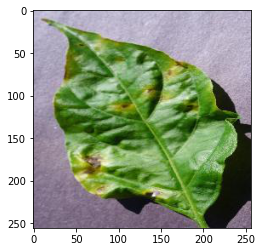

In [41]:
img_path = "../input/plant-images/images/Test/Pepper__bell___Bacterial_spot/0c2392f6-3e69-4baf-b9f3-197623f6631a___JR_B.Spot 3176.JPG"

predict_x=model.predict([prepare(img_path)]) 
classes_x=np.argmax(predict_x,axis=1)

disease=image.load_img(img_path)
plt.imshow(disease)
print (Classes[int(classes_x)])

# Prediction

In [42]:
score,accuracy =model.evaluate(test_generator,  verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

7/7 [==============================] - 1s 69ms/step - loss: 0.6365 - accuracy: 0.8341
Test score is 0.6364635825157166
Test accuracy is 0.8341463208198547


In [43]:
model.save("my_h5_model.h5")

In [44]:
from keras.models import load_model
model.save_weights('crop_weights.h5')

In [45]:
from keras.models import load_model
model=load_model('./my_h5_model.h5')
# name of the diseases 
Classes = ["Apple___Apple_scab", 
           "Apple___Black_rot", 
           "Apple___Cedar_apple_rust", 
           "Apple___healthy", 
           "Blueberry___healthy", 
           "Cherry_(including_sour)___Powdery_mildew", 
           "Cherry_(including_sour)___healthy",
           "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot", 
           "Corn_(maize)___Common_rust",  
           "Corn_(maize)___Northern_Leaf_Blight", 
           "Corn_(maize)___healthy",
           "Grape___Black_rot", 
           "Grape___Esca_(Black_Measles)", 
           "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",  
           "Grape___healthy",
           "Orange___Haunglongbing_(Citrus_greening)", 
           "Peach___Bacterial_spot", 
           "Peach___healthy", 
           "Pepper__bell___Bacterial_spot", 
           "Pepper__bell___healthy", 
           "Potato___Early_blight",
           "Potato___Late_blight",
           "Potato___healthy",
           "Raspberry___healthy", 
           "Soybean___healthy", 
           "Squash___Powdery_mildew", 
           "Strawberry___Leaf_scorch",
           "Strawberry___healthy",
           "Tomato___Bacterial_spot",
           "Tomato___Early_blight",
           "Tomato___Late_blight",
           "Tomato___Leaf_Mold",
           "Tomato___Septoria_leaf_spot",
           "Tomato___Spider_mites Two-spotted_spider_mite",
           "Tomato___Target_Spot",
           "Tomato___Tomato_Yellow_Leaf_Curl_Virus" ,
           "Tomato___Tomato_mosaic_virus",
           "Tomato___healthy",
           ]

[11]
Grape___Black_rot


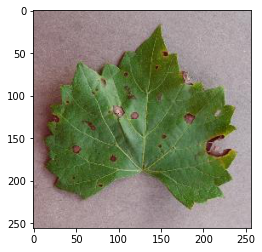

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
image_path = "../input/plant-images/images/Test/Grape___Black_rot/0aff8add-93ad-4099-97ae-23515744e620___FAM_B.Rot 0748_flipLR.JPG"
    
# result = model.predict_classes([prepare(image_path)])
predict_x=model.predict([prepare(image_path)]) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)
disease=image.load_img(image_path)
plt.imshow(disease)
print (Classes[int(classes_x)])

In [47]:
import tensorflow as tf

keras_model = tf.keras.models.load_model("./my_h5_model.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


2021-12-30 11:55:12.466804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 11:55:12.467220: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2021-12-30 11:55:12.467341: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-12-30 11:55:12.467790: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 11:55:12.468239: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 11:55:12.468578: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su